## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [14]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## DecisionTreeClassifier with Wine

In [15]:
wine = datasets.load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [16]:
acc_rfc = metrics.accuracy_score(y_test, y_pred_dtc)
print('Accuracy Score of RFC : ', acc_rfc)

Accuracy Score of RFC :  0.9444444444444444


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


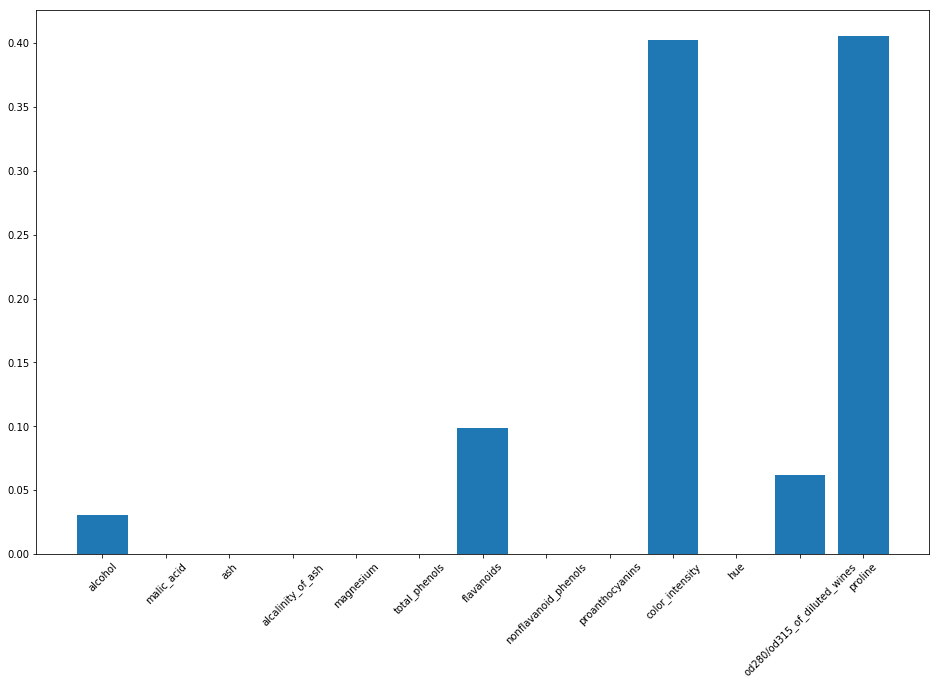

In [18]:
%matplotlib inline

figure = plt.figure(figsize=(16, 10))
plt.bar(wine.feature_names, dtc.feature_importances_)
plt.xticks(rotation=45)
plt.show()

## DecisionTreeRegressor with Boston

In [19]:
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print('MSE of DTR : ', metrics.mean_squared_error(y_test, y_pred_dtr))

MSE of DTR :  13.226764705882356


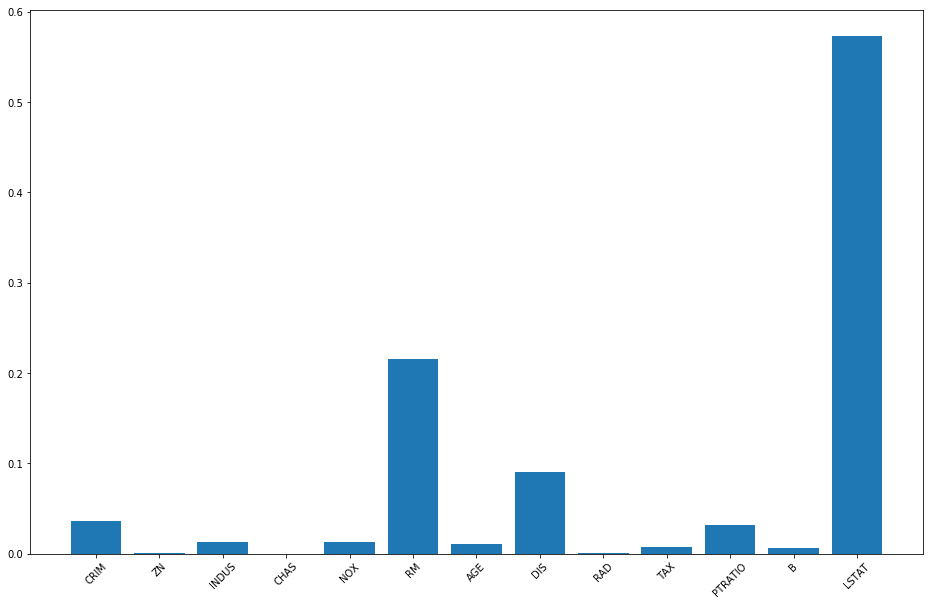

In [21]:
figure = plt.figure(figsize=(16,10))
plt.bar(boston.feature_names, dtr.feature_importances_)
plt.xticks(rotation=45)
plt.show()